In [39]:
from fairworkflows import is_fairworkflow, is_fairstep, FairStep, FairWorkflow

In [40]:
import fairworkflows

In [41]:
help (fairworkflows._version)

Help on module fairworkflows._version in fairworkflows:

NAME
    fairworkflows._version

VERSION
    0.2.6

FILE
    /Users/remzicelebi/opt/anaconda3/lib/python3.8/site-packages/fairworkflows/_version.py




In [59]:
@is_fairstep(label='Inverting the colors of an image')
def invert_colors(img):
    from PIL import Image, ImageOps
    return ImageOps.invert(img)


invert_colors._fairstep.derived_from='http://purl.org/np/RAy_jSF2DvGXu_vYCOhwgH3aPmxtRa_99lGIQJGBPeRCI'


In [86]:
@is_fairstep(label='Add blur to image')
def blur(img):
    from PIL import Image, ImageFilter
    return img.filter(ImageFilter.BLUR)


blur._fairstep.derived_from='http://purl.org/np/RAFHwmukK327MjHS25AbG-f5ok8bcYjcPRm7kAAmpBgtc'


In [42]:
@is_fairstep(label='Convert image to grayscale')
def rgb2gray_image(image):    
    from PIL import Image
    new_image = image.convert('L')
    return new_image

In [43]:
@is_fairstep(label='Invert image')
def invert_image(image):    
    from PIL import Image, ImageOps
    im_inverted = ImageOps.invert(image.convert('RGB') ).convert('L')
    return im_inverted

In [44]:
@is_fairstep(label='Blur image')
def blur_image(image):    
    from PIL import Image, ImageFilter
    im_blurred = image.filter(ImageFilter.BLUR)
    return im_blurred

In [45]:
@is_fairstep(label='Blend two images')
def blend_image(im1, im2):    
    from PIL import Image
    im_blended= Image.blend(im1, im2, alpha=0.5)
    return im_blended

In [46]:
@is_fairstep(label='contrast image by factor')
def contrast_image(image, ratio):    
    from PIL import Image, ImageEnhance
    new_image= image.convert('RGB')
    new_image = ImageEnhance.Contrast(image)
    new_image= new_image.enhance(ratio)
    return new_image

In [87]:
@is_fairworkflow(label='Converting an image to Pencil Sketch')
def convertim2sketch_workflow(im):
    im1 = rgb2gray_image(im)
    im2 = invert_colors(im1)
    im3 = blur(im2)
    im4 = blend_image(im3, im1)
    im_out= contrast_image(im4, 20.5)
    return im_out

In [93]:
from PIL import Image
#image = Image.open('img/puppy.png')
image = Image.open('img/mountains.png')

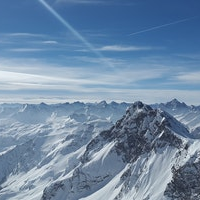

In [94]:
image

In [95]:
fw = FairWorkflow.from_function(convertim2sketch_workflow)

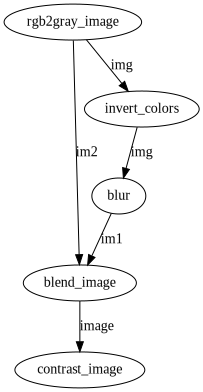

In [96]:
fw.display()

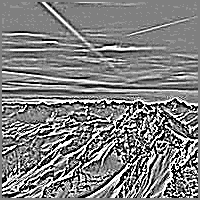

In [97]:
result, prov = fw.execute(image)
result

In [99]:
image2 = Image.open('img/puppy.png')

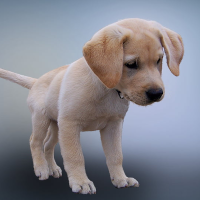

In [101]:
image2

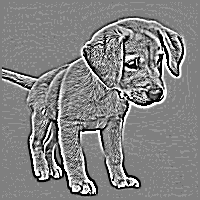

In [100]:
result2, prov2 = fw.execute(image2)
result2

In [98]:
rgb2gray_image._fairstep.publish_as_nanopub()

/Users/remzicelebi/opt/anaconda3/lib/python3.8/site-packages/fairworkflows/rdf_wrapper.py:289: UserWarning: Cannot publish() this Fair object. This rdf is already published (at http://purl.org/np/RA_53u4yrUqoWcZMyzsOCba-E5QMBdLZ7Dn_rPWUcfgU8#step) and has not been modified locally.
  warnings.warn(f'Cannot publish() this Fair object. '


In [54]:
invert_image._fairstep.publish_as_nanopub()

Published to http://purl.org/np/RAY4ToM3TgFasdOYoibW8L_AIwo9PLmq8aBTjBtVoSoXk
Published concept to http://purl.org/np/RAY4ToM3TgFasdOYoibW8L_AIwo9PLmq8aBTjBtVoSoXk#step


In [55]:
blur_image._fairstep.publish_as_nanopub()

Published to http://purl.org/np/RAkLEQ9oJxc-_IYPyo2_wVrlSaqbrtomZ4SYOH0oObj0A
Published concept to http://purl.org/np/RAkLEQ9oJxc-_IYPyo2_wVrlSaqbrtomZ4SYOH0oObj0A#step


In [56]:
blend_image._fairstep.publish_as_nanopub()

Published to http://purl.org/np/RAUFOWeBoesDV2E0UCY0gcxAIRg0GOShdW6tx-PgayiBw
Published concept to http://purl.org/np/RAUFOWeBoesDV2E0UCY0gcxAIRg0GOShdW6tx-PgayiBw#step


In [57]:
contrast_image._fairstep.publish_as_nanopub()

Published to http://purl.org/np/RAY1W7VRGwNznJp18etfmPczbkQlvFRK8mSVj8x-jCtl8
Published concept to http://purl.org/np/RAY1W7VRGwNznJp18etfmPczbkQlvFRK8mSVj8x-jCtl8#step
